# CUSTOMER SEGMENTATION


### IMPORT LIBARIES

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

### LOADING DATA:




In [46]:
data=pd.read_csv('customer_train (1).csv')
data.head()

Unnamed: 0.1  Unnamed: 0    ID  Year_Birth Education Marital_Status   
0             0           0  5524        1957        S1         Lajang  \
1             1           1  2174        1954        S1         Lajang   
2             2           2  4141        1965        S1    Bertunangan   
3             3           3  6182        1984        S1    Bertunangan   
4             4           4  5324        1981        S3        Menikah   

       Income  Kidhome  Teenhome Dt_Customer  ...  NumWebVisitsMonth   
0  58138000.0        0         0  04-09-2012  ...                  7  \
1  46344000.0        1         1  08-03-2014  ...                  5   
2  71613000.0        0         0  21-08-2013  ...                  4   
3  26646000.0        1         0  10-02-2014  ...                  6   
4  58293000.0        1         0  19-01-2014  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   
0             0             0             0             0             0  \
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0  
3         0              3         11         0  
4         0              3         11         0  

[5 rows x 31 columns]

In [3]:
print('no of datapoints in the data:',len(data))

no of datapoints in the data: 1680


In [4]:
data.shape

(1680, 31)

In [5]:
data.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

### DATA CLEANING


In [47]:
data.isnull()

Unnamed: 0.1  Unnamed: 0     ID  Year_Birth  Education  Marital_Status   
0            False       False  False       False      False           False  \
1            False       False  False       False      False           False   
2            False       False  False       False      False           False   
3            False       False  False       False      False           False   
4            False       False  False       False      False           False   
...            ...         ...    ...         ...        ...             ...   
1675         False       False  False       False      False           False   
1676         False       False  False       False      False           False   
1677         False       False  False       False      False           False   
1678         False       False  False       False      False           False   
1679         False       False  False       False      False           False   

      Income  Kidhome  Teenhome  Dt_Customer  ...  NumWebVisitsMonth   
0      False    False     False        False  ...              False  \
1      False    False     False        False  ...              False   
2      False    False     False        False  ...              False   
3      False    False     False        False  ...              False   
4      False    False     False        False  ...              False   
...      ...      ...       ...          ...  ...                ...   
1675   False    False     False        False  ...              False   
1676   False    False     False        False  ...              False   
1677   False    False     False        False  ...              False   
1678   False    False     False        False  ...              False   
1679   False    False     False        False  ...              False   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   
0            False         False         False         False         False  \
1            False         False         False         False         False   
2            False         False         False         False         False   
3            False         False         False         False         False   
4            False         False         False         False         False   
...            ...           ...           ...           ...           ...   
1675         False         False         False         False         False   
1676         False         False         False         False         False   
1677         False         False         False         False         False   
1678         False         False         False         False         False   
1679         False         False         False         False         False   

      Complain  Z_CostContact  Z_Revenue  Response  
0        False          False      False     False  
1        False          False      False     False  
2        False          False      False     False  
3        False          False      False     False  
4        False          False      False     False  
...        ...            ...        ...       ...  
1675     False          False      False     False  
1676     False          False      False     False  
1677     False          False      False     False  
1678     False          False      False     False  
1679     False          False      False     False  

[1680 rows x 31 columns]

In [8]:
data.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [48]:
data=data.dropna()
data

Unnamed: 0.1  Unnamed: 0    ID  Year_Birth Education Marital_Status   
0                0           0  5524        1957        S1         Lajang  \
1                1           1  2174        1954        S1         Lajang   
2                2           2  4141        1965        S1    Bertunangan   
3                3           3  6182        1984        S1    Bertunangan   
4                4           4  5324        1981        S3        Menikah   
...            ...         ...   ...         ...       ...            ...   
1675          1675        1675  4712        1991        D3    Bertunangan   
1676          1676        1676  1170        1975        S1        Menikah   
1677          1677        1677  6347        1979       SMA         Lajang   
1678          1678        1678  4065        1976        S3        Menikah   
1679          1679        1679  8230        1980        S1        Menikah   

          Income  Kidhome  Teenhome Dt_Customer  ...  NumWebVisitsMonth   
0     58138000.0        0         0  04-09-2012  ...                  7  \
1     46344000.0        1         1  08-03-2014  ...                  5   
2     71613000.0        0         0  21-08-2013  ...                  4   
3     26646000.0        1         0  10-02-2014  ...                  6   
4     58293000.0        1         0  19-01-2014  ...                  5   
...          ...      ...       ...         ...  ...                ...   
1675  20193000.0        0         0  28-11-2012  ...                  4   
1676  27573000.0        1         0  25-03-2013  ...                  8   
1677  15862000.0        1         0  27-06-2013  ...                  8   
1678  49544000.0        1         0  12-02-2013  ...                  7   
1679  33228000.0        1         0  23-01-2014  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   
0                0             0             0             0             0  \
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
1675             0             0             0             0             0   
1676             0             0             0             0             0   
1677             0             0             0             0             0   
1678             0             0             0             0             0   
1679             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
1675         0              3         11         0  
1676         0              3         11         0  
1677         0              3         11         0  
1678         0              3         11         0  
1679         0              3         11         0  

[1663 rows x 31 columns]

In [10]:
data.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
print(len(data))

1663


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1663 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1663 non-null   int64  
 1   Unnamed: 0           1663 non-null   int64  
 2   ID                   1663 non-null   int64  
 3   Year_Birth           1663 non-null   int64  
 4   Education            1663 non-null   object 
 5   Marital_Status       1663 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1663 non-null   int64  
 8   Teenhome             1663 non-null   int64  
 9   Dt_Customer          1663 non-null   object 
 10  Recency              1663 non-null   int64  
 11  MntCoke              1663 non-null   int64  
 12  MntFruits            1663 non-null   int64  
 13  MntMeatProducts      1663 non-null   int64  
 14  MntFishProducts      1663 non-null   int64  
 15  MntSweetProducts     1663 non-null   int64 

In [13]:
data.duplicated().sum()

0

 **The "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record**.

**Thus to get the values I must check the newest and oldest recorded dates**
.

In [49]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],format='mixed')
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))



The newest customer's enrolment date in therecords: 2014-12-05
The oldest customer's enrolment date in the records: 2012-01-08


**CREATING A FEATURE 'Customer_for' IT INDICATES THE NO.OF DAYS CUSTOMER STARTED  SHOPPING IN THE  STORE RELATIVE TO THE LAST
RECORDED DATE**.

In [50]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")
data

Unnamed: 0.1  Unnamed: 0    ID  Year_Birth Education Marital_Status   
0                0           0  5524        1957        S1         Lajang  \
1                1           1  2174        1954        S1         Lajang   
2                2           2  4141        1965        S1    Bertunangan   
3                3           3  6182        1984        S1    Bertunangan   
4                4           4  5324        1981        S3        Menikah   
...            ...         ...   ...         ...       ...            ...   
1675          1675        1675  4712        1991        D3    Bertunangan   
1676          1676        1676  1170        1975        S1        Menikah   
1677          1677        1677  6347        1979       SMA         Lajang   
1678          1678        1678  4065        1976        S3        Menikah   
1679          1679        1679  8230        1980        S1        Menikah   

          Income  Kidhome  Teenhome Dt_Customer  ...  AcceptedCmp3   
0     58138000.0        0         0  2012-04-09  ...             0  \
1     46344000.0        1         1  2014-08-03  ...             0   
2     71613000.0        0         0  2013-08-21  ...             0   
3     26646000.0        1         0  2014-10-02  ...             0   
4     58293000.0        1         0  2014-01-19  ...             0   
...          ...      ...       ...         ...  ...           ...   
1675  20193000.0        0         0  2012-11-28  ...             0   
1676  27573000.0        1         0  2013-03-25  ...             0   
1677  15862000.0        1         0  2013-06-27  ...             0   
1678  49544000.0        1         0  2013-12-02  ...             0   
1679  33228000.0        1         0  2014-01-23  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain   
0                0             0             0             0         0  \
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
1675             0             0             0             0         0   
1676             0             0             0             0         0   
1677             0             0             0             0         0   
1678             0             0             0             0         0   
1679             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response       Customer_For  
0                 3         11         1  83808000000000000  
1                 3         11         0  10713600000000000  
2                 3         11         0  40694400000000000  
3                 3         11         0   5529600000000000  
4                 3         11         0  27648000000000000  
...             ...        ...       ...                ...  
1675              3         11         0  63676800000000000  
1676              3         11         0  53568000000000000  
1677              3         11         0  45446400000000000  
1678              3         11         0  31795200000000000  
1679              3         11         0  27302400000000000  

[1663 rows x 32 columns]

**THE DETAILS OF CATAGORICAL DATA**

In [16]:
data["Marital_Status"].value_counts()

Marital_Status
Menikah        644
Bertunangan    434
Lajang         353
Cerai          177
Janda           52
Duda             3
Name: count, dtype: int64

In [17]:
 data["Education"].value_counts()

Education
S1     825
S3     369
S2     277
D3     157
SMA     35
Name: count, dtype: int64

**Then we creating some features like 'age','spent','living_with','children','family_size','is_parent','education' from the existing column and also drop seme unwanted column**.

In [51]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]
data

Unnamed: 0.1  Unnamed: 0    ID  Year_Birth Education Marital_Status   
0                0           0  5524        1957        S1         Lajang  \
1                1           1  2174        1954        S1         Lajang   
2                2           2  4141        1965        S1    Bertunangan   
3                3           3  6182        1984        S1    Bertunangan   
4                4           4  5324        1981        S3        Menikah   
...            ...         ...   ...         ...       ...            ...   
1675          1675        1675  4712        1991        D3    Bertunangan   
1676          1676        1676  1170        1975        S1        Menikah   
1677          1677        1677  6347        1979       SMA         Lajang   
1678          1678        1678  4065        1976        S3        Menikah   
1679          1679        1679  8230        1980        S1        Menikah   

          Income  Kidhome  Teenhome Dt_Customer  ...  AcceptedCmp4   
0     58138000.0        0         0  2012-04-09  ...             0  \
1     46344000.0        1         1  2014-08-03  ...             0   
2     71613000.0        0         0  2013-08-21  ...             0   
3     26646000.0        1         0  2014-10-02  ...             0   
4     58293000.0        1         0  2014-01-19  ...             0   
...          ...      ...       ...         ...  ...           ...   
1675  20193000.0        0         0  2012-11-28  ...             0   
1676  27573000.0        1         0  2013-03-25  ...             0   
1677  15862000.0        1         0  2013-06-27  ...             0   
1678  49544000.0        1         0  2013-12-02  ...             0   
1679  33228000.0        1         0  2014-01-23  ...             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact   
0                0             0             0         0              3  \
1                0             0             0         0              3   
2                0             0             0         0              3   
3                0             0             0         0              3   
4                0             0             0         0              3   
...            ...           ...           ...       ...            ...   
1675             0             0             0         0              3   
1676             0             0             0         0              3   
1677             0             0             0         0              3   
1678             0             0             0         0              3   
1679             0             0             0         0              3   

      Z_Revenue  Response       Customer_For  Age  
0            11         1  83808000000000000   64  
1            11         0  10713600000000000   67  
2            11         0  40694400000000000   56  
3            11         0   5529600000000000   37  
4            11         0  27648000000000000   40  
...         ...       ...                ...  ...  
1675         11         0  63676800000000000   30  
1676         11         0  53568000000000000   46  
1677         11         0  45446400000000000   42  
1678         11         0  31795200000000000   45  
1679         11         0  27302400000000000   41  

[1663 rows x 33 columns]

In [52]:
#Total spendings on various items
data["Spent"] = data["MntCoke"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]


In [53]:
#converting catagorical in to numerical
data["Marital_Status"]=data["Marital_Status"].replace({'Menikah':'0','Bertunangan':'1', 'Lajang':'2','Cerai':'3' ,'Janda':'4', 'Duda':'5'})
data["Education"]=data["Education"].replace({"S1":"0", "S3":"1", "S2":"2", "D3":"3", "SMA":"4"})

In [54]:
#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]


In [55]:
#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)


In [56]:
#For clarity
data=data.rename(columns={"MntCoke": "Coke","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


In [57]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [24]:
data

Unnamed: 0.1  Unnamed: 0 Education      Income  Kidhome  Teenhome   
0                0           0         0  58138000.0        0         0  \
1                1           1         0  46344000.0        1         1   
2                2           2         0  71613000.0        0         0   
3                3           3         0  26646000.0        1         0   
4                4           4         1  58293000.0        1         0   
...            ...         ...       ...         ...      ...       ...   
1675          1675        1675         3  20193000.0        0         0   
1676          1676        1676         0  27573000.0        1         0   
1677          1677        1677         4  15862000.0        1         0   
1678          1678        1678         1  49544000.0        1         0   
1679          1679        1679         0  33228000.0        1         0   

      Recency  MntCoke  MntFruits  MntMeatProducts  ...  AcceptedCmp5   
0          58   635000      88000           546000  ...             0  \
1          38    11000       1000             6000  ...             0   
2          26   426000      49000           127000  ...             0   
3          26    11000       4000            20000  ...             0   
4          94   173000      43000           118000  ...             0   
...       ...      ...        ...              ...  ...           ...   
1675       18     8000       8000            22000  ...             0   
1676       45    50000      15000           110000  ...             0   
1677       26     1000       1000             4000  ...             0   
1678        0   308000          0            73000  ...             0   
1679       28    22000       2000            31000  ...             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response       Customer_For  Age   
0                0             0         0         1  83808000000000000   64  \
1                0             0         0         0  10713600000000000   67   
2                0             0         0         0  40694400000000000   56   
3                0             0         0         0   5529600000000000   37   
4                0             0         0         0  27648000000000000   40   
...            ...           ...       ...       ...                ...  ...   
1675             0             0         0         0  63676800000000000   30   
1676             0             0         0         0  53568000000000000   46   
1677             0             0         0         0  45446400000000000   42   
1678             0             0         0         0  31795200000000000   45   
1679             0             0         0         0  27302400000000000   41   

        Spent  Children  Is_Parent  
0     1617000         0          0  
1       27000         2          1  
2      776000         0          0  
3       53000         1          1  
4      422000         1          1  
...       ...       ...        ...  
1675    82000         0          0  
1676   244000         1          1  
1677    36000         1          1  
1678   404000         1          1  
1679    71000         1          1  

[1663 rows x 30 columns]

In [25]:
data.describe()

Unnamed: 0.1   Unnamed: 0        Income      Kidhome     Teenhome   
count   1663.000000  1663.000000  1.663000e+03  1663.000000  1663.000000  \
mean     843.901383   843.901383  5.201434e+07     0.449188     0.499098   
std      482.471617   482.471617  2.148248e+07     0.544890     0.549449   
min        0.000000     0.000000  1.730000e+06     0.000000     0.000000   
25%      428.500000   428.500000  3.568800e+07     0.000000     0.000000   
50%      844.000000   844.000000  5.125000e+07     0.000000     0.000000   
75%     1259.500000  1259.500000  6.812200e+07     1.000000     1.000000   
max     1679.000000  1679.000000  1.623970e+08     2.000000     2.000000   

           Recency       MntCoke      MntFruits  MntMeatProducts   
count  1663.000000  1.663000e+03    1663.000000     1.663000e+03  \
mean     49.061335  3.060469e+05   25978.352375     1.664546e+05   
std      28.914182  3.392420e+05   39576.041604     2.248949e+05   
min       0.000000  0.000000e+00       0.000000     1.000000e+03   
25%      24.000000  2.400000e+04    1000.000000     1.600000e+04   
50%      50.000000  1.730000e+05    8000.000000     6.800000e+04   
75%      74.000000  4.990000e+05   32000.000000     2.345000e+05   
max      99.000000  1.492000e+06  199000.000000     1.725000e+06   

       MntFishProducts  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   
count      1663.000000  ...   1663.000000   1663.000000   1663.000000  \
mean      37110.042093  ...      0.069753      0.061936      0.012026   
std       54348.868950  ...      0.254808      0.241112      0.109037   
min           0.000000  ...      0.000000      0.000000      0.000000   
25%        3000.000000  ...      0.000000      0.000000      0.000000   
50%       12000.000000  ...      0.000000      0.000000      0.000000   
75%       48000.000000  ...      0.000000      0.000000      0.000000   
max      259000.000000  ...      1.000000      1.000000      1.000000   

          Complain     Response  Customer_For          Age         Spent   
count  1663.000000  1663.000000  1.663000e+03  1663.000000  1.663000e+03  \
mean      0.010222     0.145520  4.411216e+16    52.150932  6.059008e+05   
std       0.100618     0.352731  2.000642e+16    12.037325  6.027183e+05   
min       0.000000     0.000000  0.000000e+00    25.000000  5.000000e+03   
25%       0.000000     0.000000  2.946240e+16    44.000000  6.950000e+04   
50%       0.000000     0.000000  4.406400e+16    51.000000  3.930000e+05   
75%       0.000000     0.000000  5.909760e+16    61.000000  1.043500e+06   
max       1.000000     1.000000  9.175680e+16   128.000000  2.525000e+06   

          Children    Is_Parent  
count  1663.000000  1663.000000  
mean      0.948286     0.710162  
std       0.759834     0.453823  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     1.000000  
75%       1.000000     1.000000  
max       3.000000     1.000000  

[8 rows x 29 columns]

**we must take a look at the broader view of the data. I will plot some of the selected features**.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

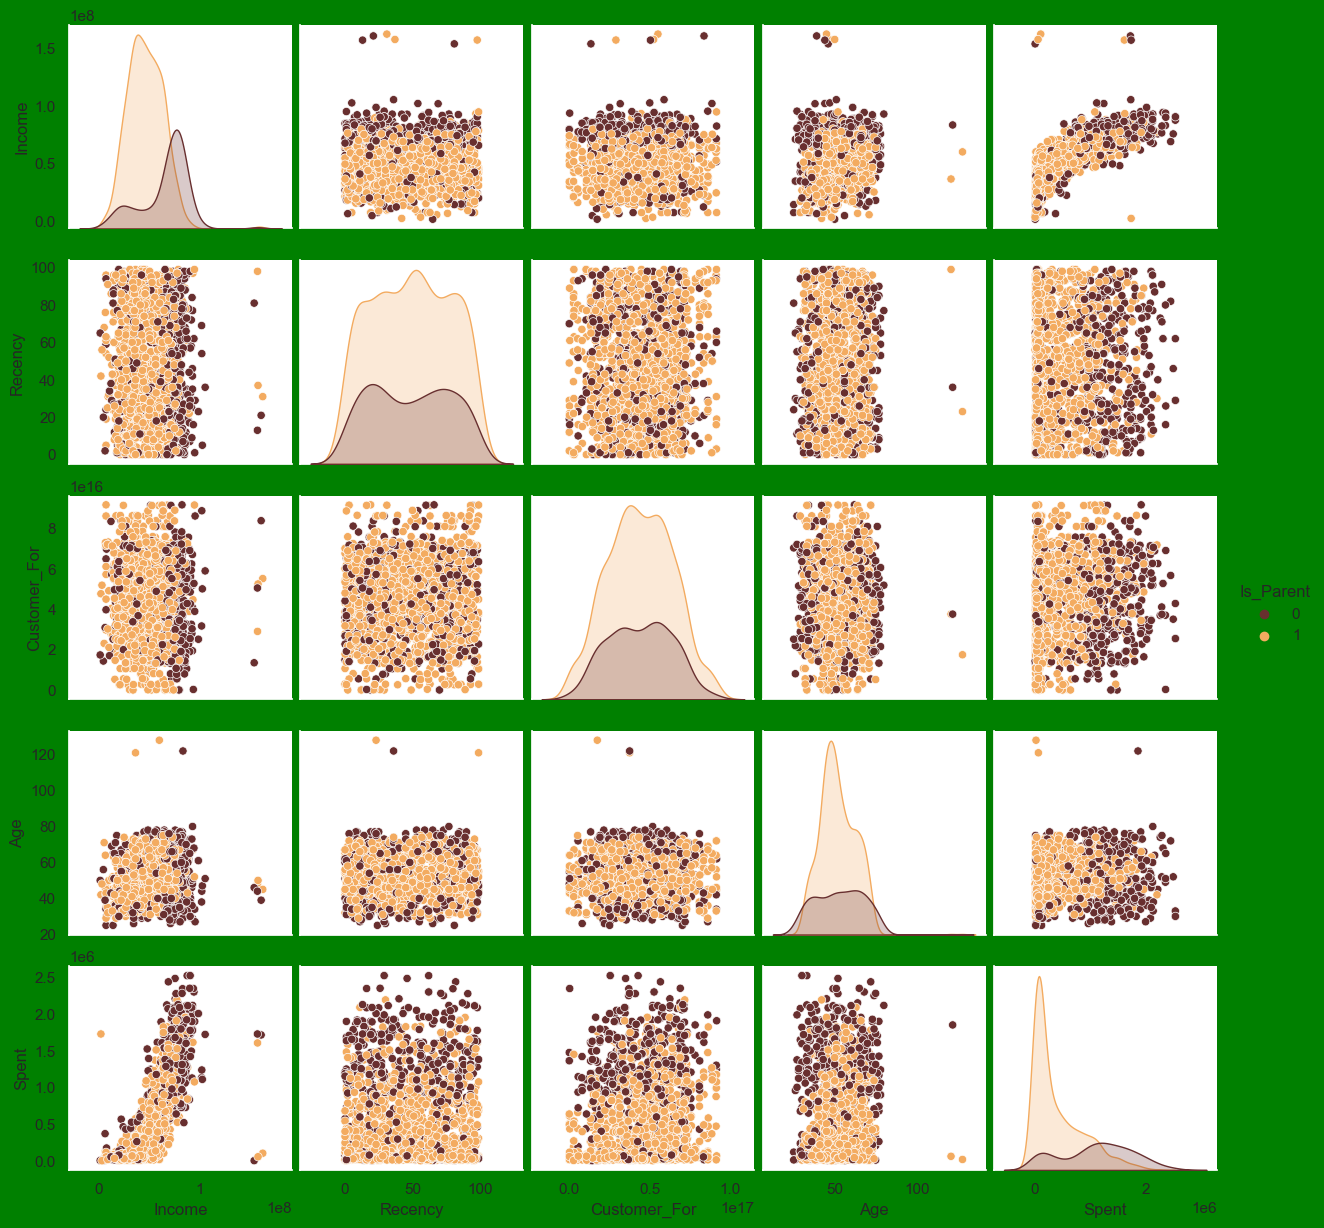

In [58]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"green"})
pallet = ["yellow", "blue", "red", "violet", "green", "orange"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

**Heatmap**



<Axes: >

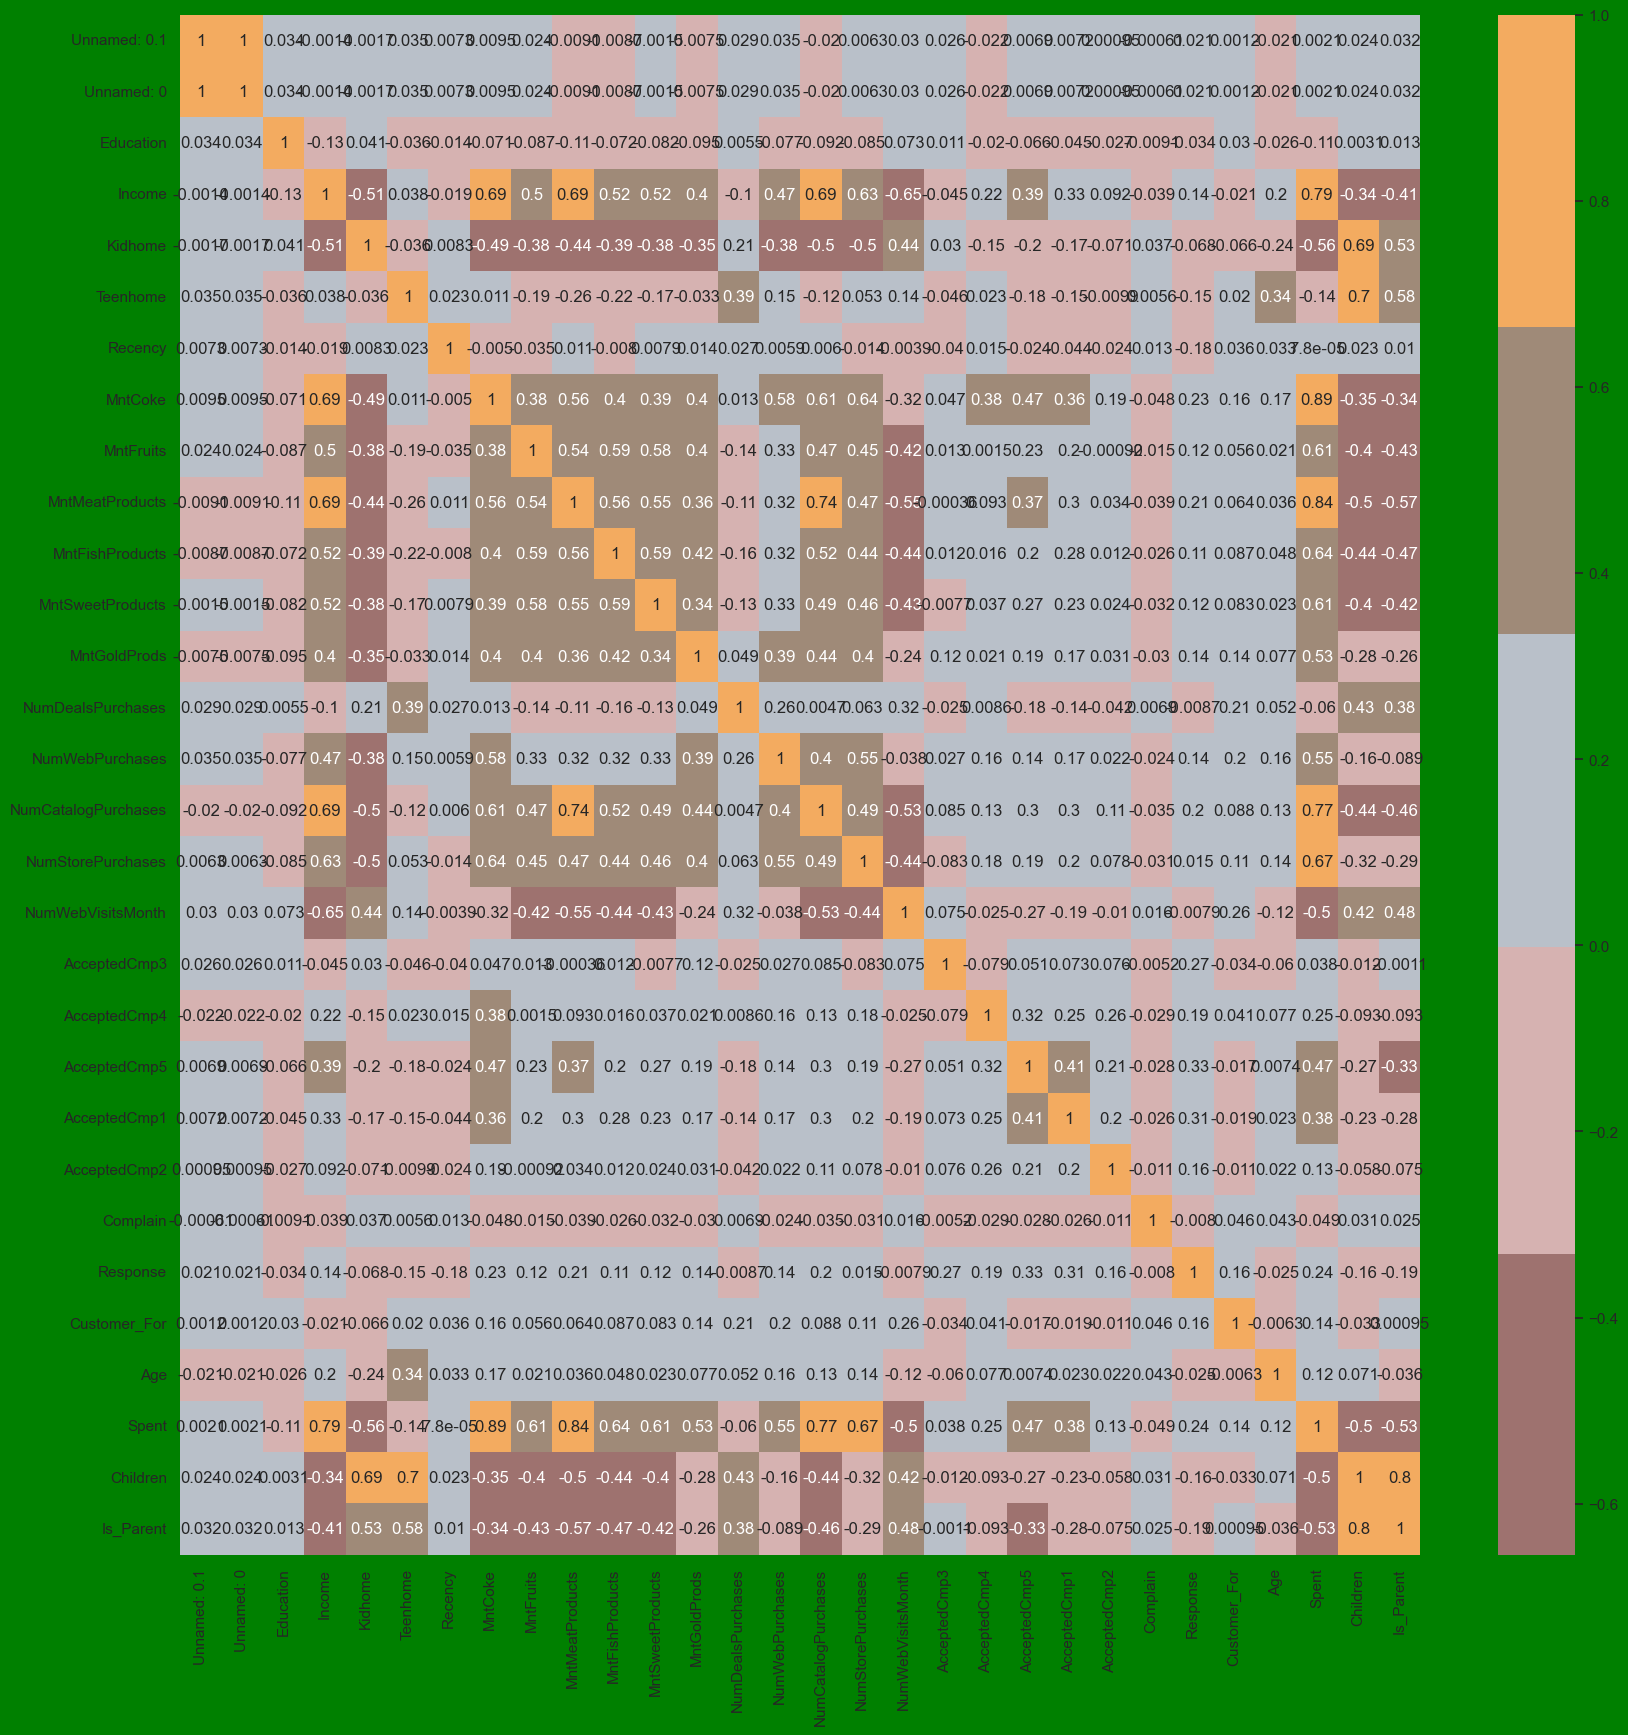

In [27]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

**DATA PREPROCESSING**

In [59]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education']


In [60]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [61]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [62]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Unnamed: 0.1  Unnamed: 0  Education    Income   Kidhome  Teenhome   
0     -1.749647   -1.749647  -0.833869  0.285139 -0.824613 -0.908634  \
1     -1.747574   -1.747574  -0.833869 -0.264031  1.011172  0.911918   
2     -1.745501   -1.745501  -0.833869  0.912583 -0.824613 -0.908634   
3     -1.743428   -1.743428  -0.833869 -1.181241  1.011172 -0.908634   
4     -1.741354   -1.741354   0.070123  0.292357  1.011172 -0.908634   

    Recency      Coke    Fruits      Meat  ...  NumDealsPurchases   
0  0.309238  0.969963  1.567623  1.688165  ...           0.338224  \
1 -0.382672 -0.869986 -0.631338 -0.713680  ...          -0.173109   
2 -0.797819  0.353698  0.581882 -0.175489  ...          -0.684442   
3 -0.797819 -0.869986 -0.555512 -0.651410  ...          -0.173109   
4  1.554676 -0.392307  0.430229 -0.215519  ...           1.360890   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth   
0         1.514416             2.456014          -0.554217           0.680756  \
1        -1.161558            -0.564708          -1.170714          -0.135464   
2         1.514416            -0.229072           1.295274          -0.543574   
3        -0.779276            -0.900343          -0.554217           0.272646   
4         0.367570             0.106564           0.062280          -0.135464   

   Customer_For       Age     Spent  Children  Is_Parent  
0      1.984752  0.984657  1.678070 -1.248393  -1.565314  
1     -1.669895  1.233956 -0.960772  1.384552   0.638850  
2     -0.170885  0.319857  0.282305 -1.248393  -1.565314  
3     -1.929089 -1.259041 -0.917621  0.068080   0.638850  
4     -0.823192 -1.009742 -0.305211  0.068080   0.638850  

[5 rows x 23 columns]

### DIMENSIONALITY REDUCTION

*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables*.

**Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss**.

Steps in this section:

Dimensionality reduction with PCA

Plotting the reduced dataframe

Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 3.

In [63]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%   
col1  1663.0 -4.272656e-18  2.818209 -4.979669 -2.564573 -0.816858  2.387340  \
col2  1663.0  5.127188e-17  1.615474 -3.514889 -1.287118 -0.218989  1.170522   
col3  1663.0  0.000000e+00  1.413526 -2.839853 -1.179253  0.001132  1.201346   

           max  
col1  7.478096  
col2  5.615289  
col3  2.974497

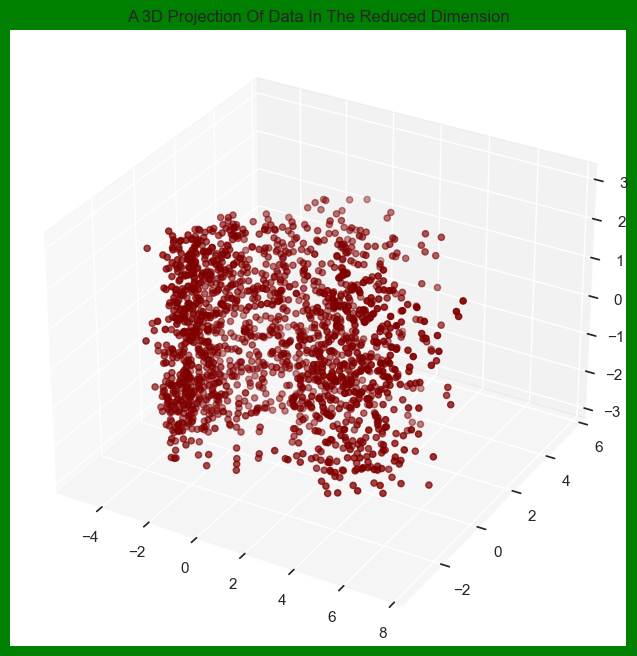

In [64]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### CLUSTERING:

**Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved**.

Steps involved in the Clustering

Elbow Method to determine the number of clusters to be formed.

Clustering via Agglomerative Clustering.

Examining the clusters formed via scatter plot.

Elbow Method to determine the number of clusters to be formed:


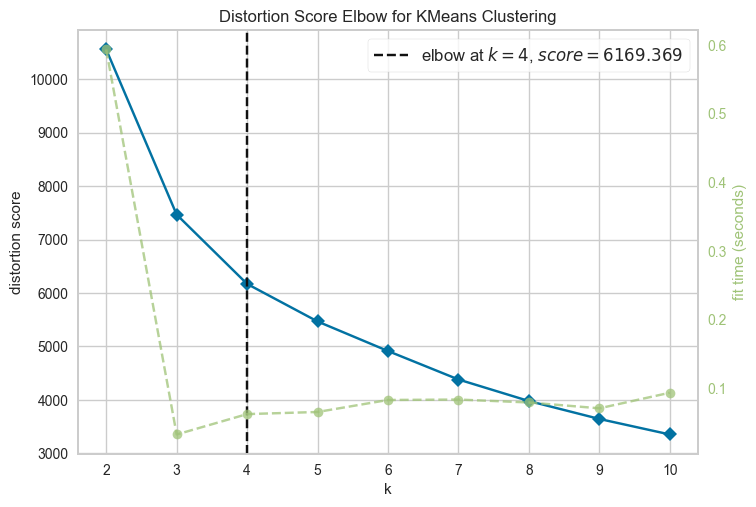

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
# Quick examination of elbow method to find numbers of clusters to make.
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

*The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters*.

In [66]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

**To examine the clusters formed let's have a look at the 3-D distribution of the clusters**.

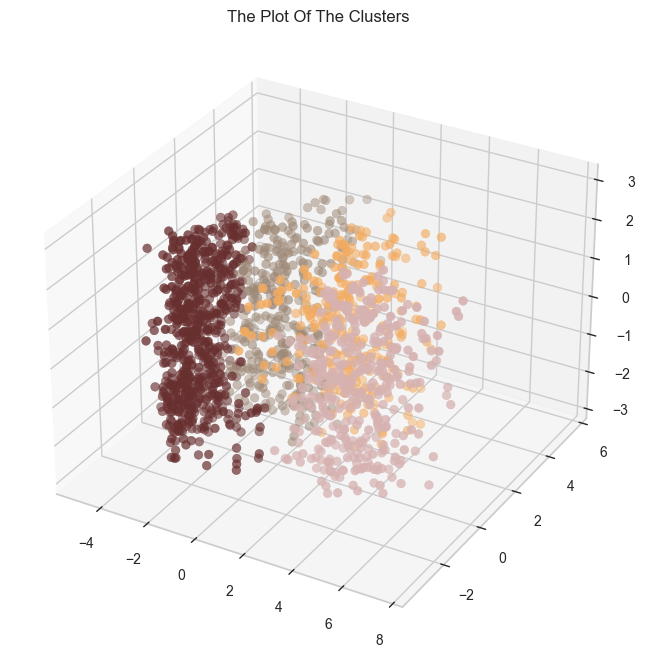

In [67]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

## EVALUATING MODELS 


**Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns**.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

Firstly, let us have a look at the group distribution of clustring.

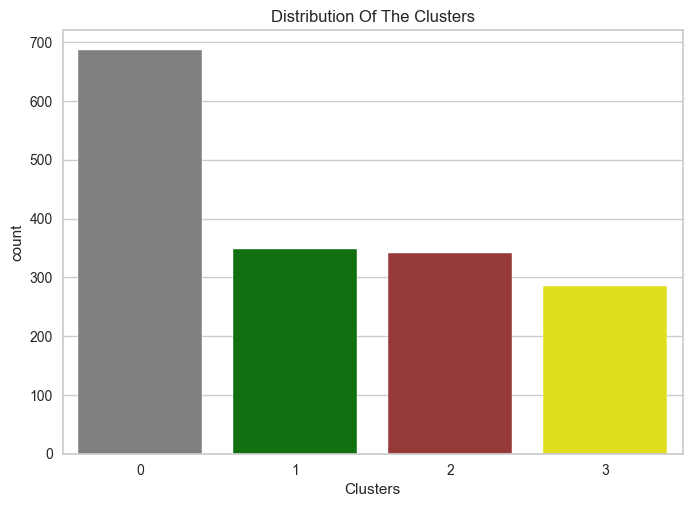

In [68]:
#Plotting countplot of clusters
pal = ["gray","green", "brown","yellow"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

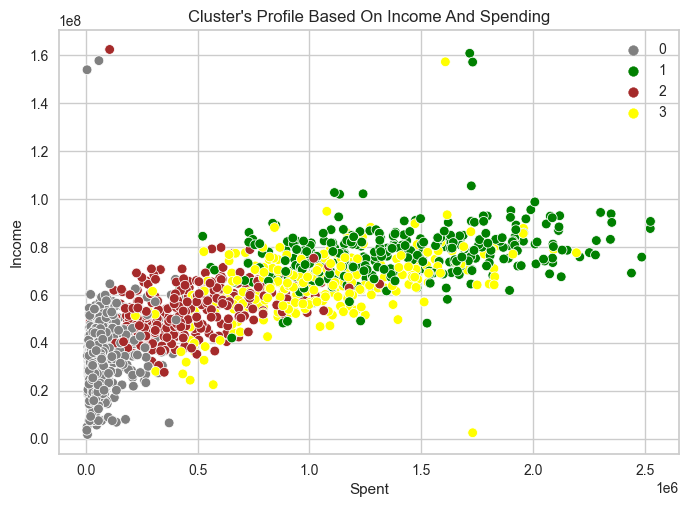

In [69]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**income vs spending plot shows the clusters pattern**

#group 0: high spending & average income.

#group 1: high spending & high income.

#group 2: low spending & low income.

#group 3: high spending & low income.

-Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

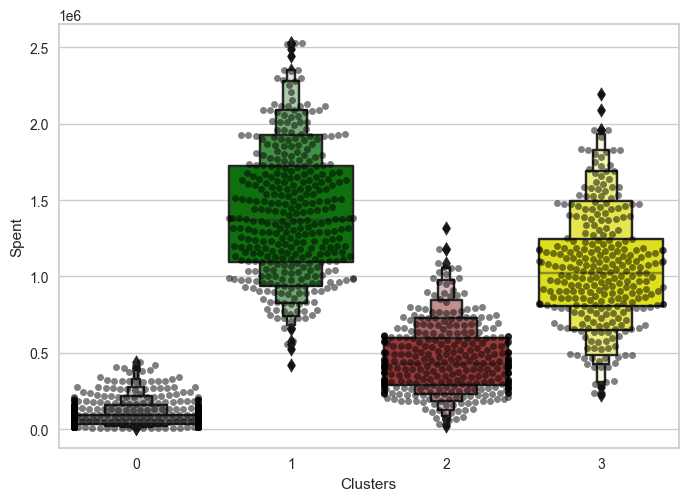

In [40]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "black", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

**From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies**.

**Let us next explore how did our campaigns do in the past**.

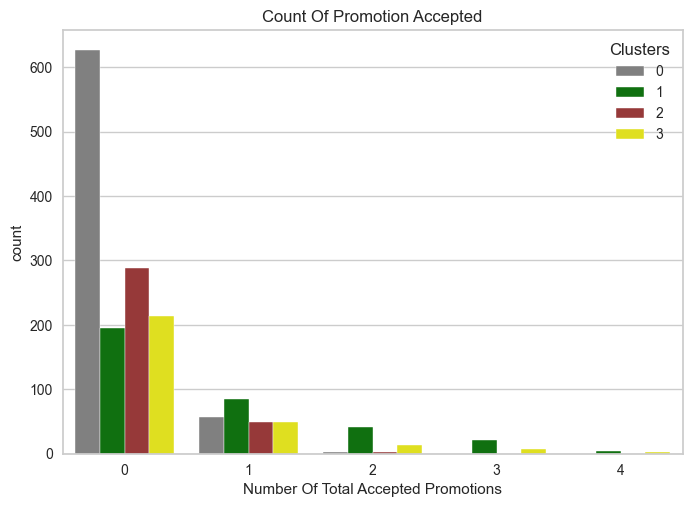

In [41]:

#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

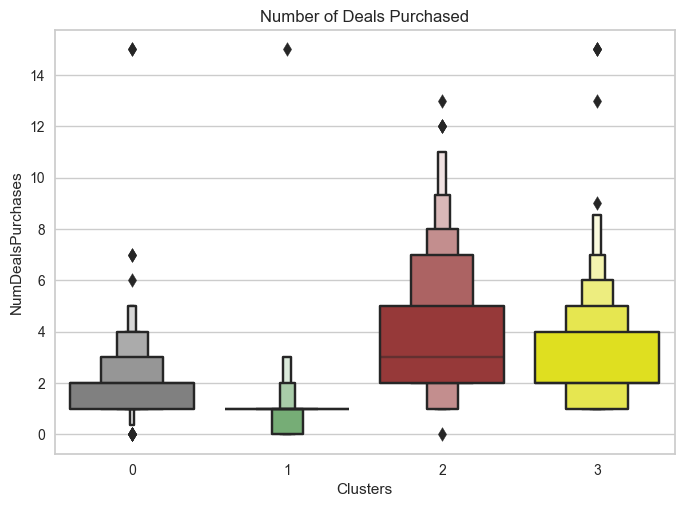

In [42]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

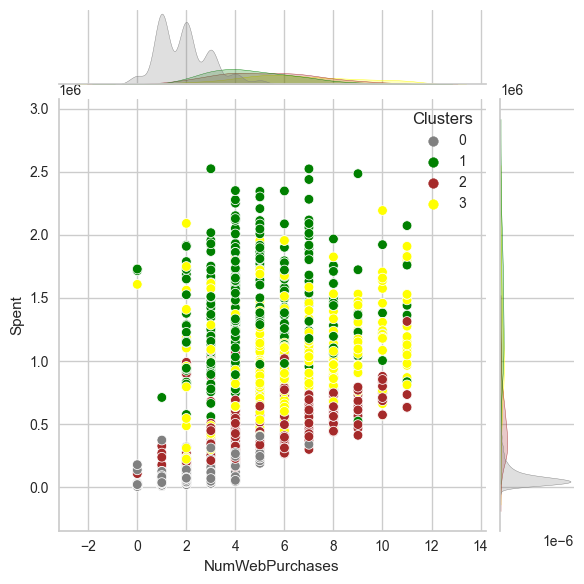

<Figure size 800x550 with 0 Axes>

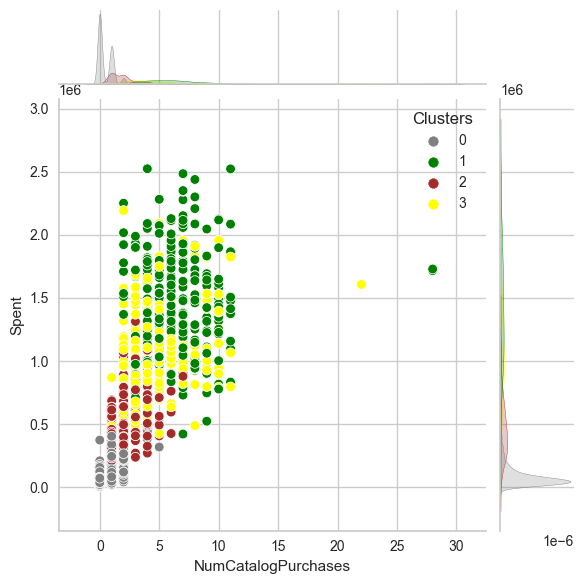

<Figure size 800x550 with 0 Axes>

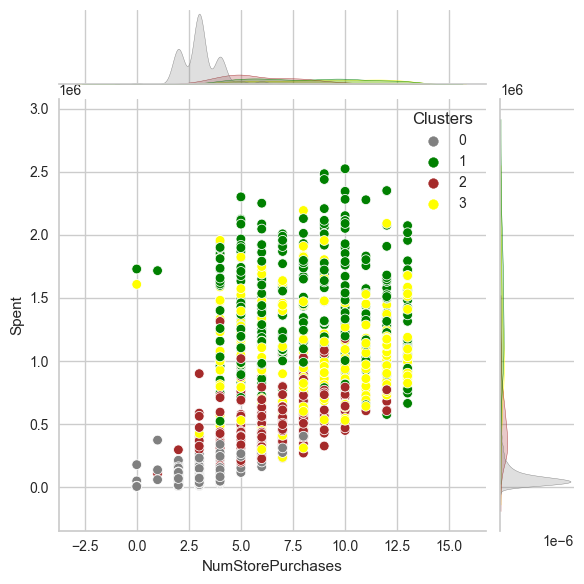

<Figure size 800x550 with 0 Axes>

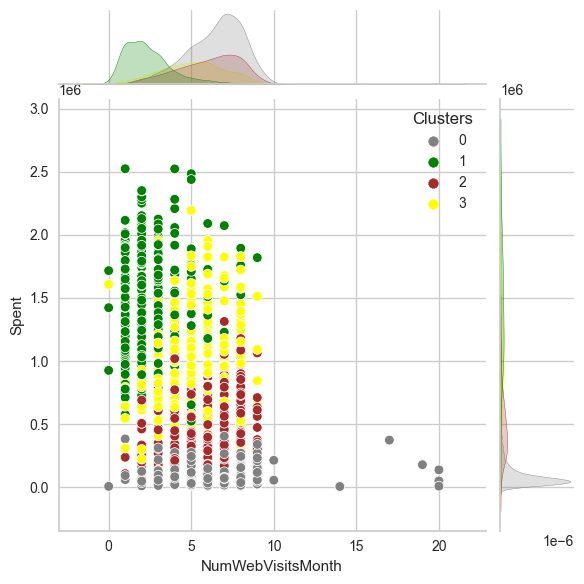

In [43]:
#for more details on the purchasing style 
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in Places:
    plt.figure()
    sns.jointplot(x=data[i],y = data["Spent"],hue=data["Clusters"], palette= pal)
    plt.show()

## PROFILING

**Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team**.

**To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions**.

<Figure size 800x550 with 0 Axes>

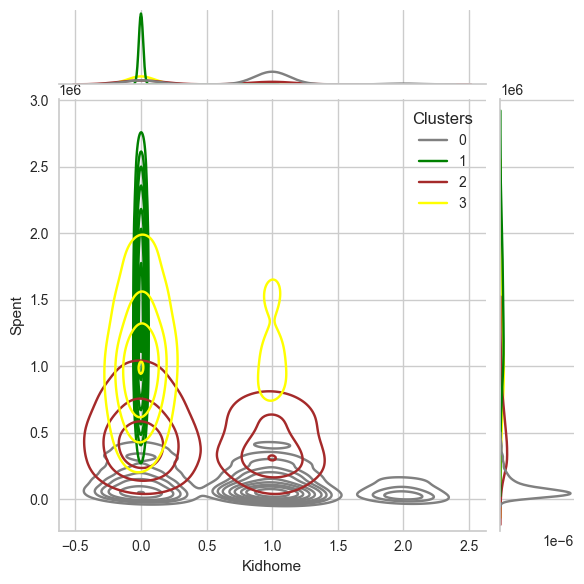

<Figure size 800x550 with 0 Axes>

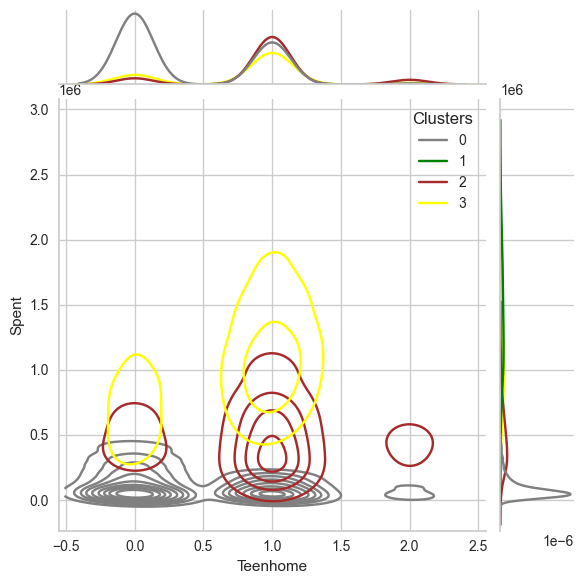

<Figure size 800x550 with 0 Axes>

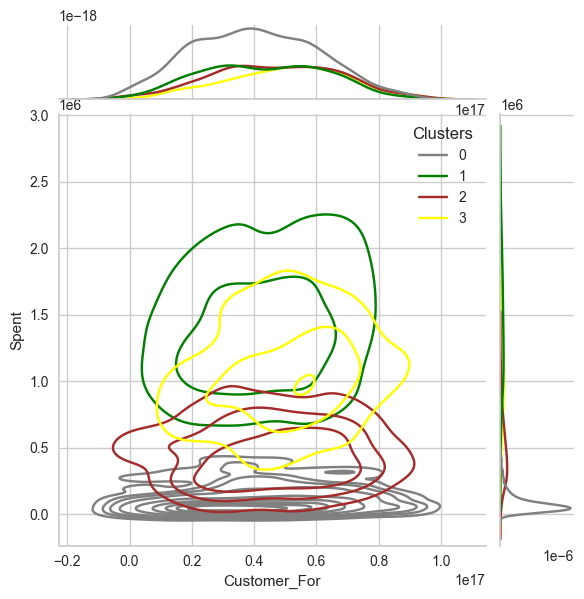

<Figure size 800x550 with 0 Axes>

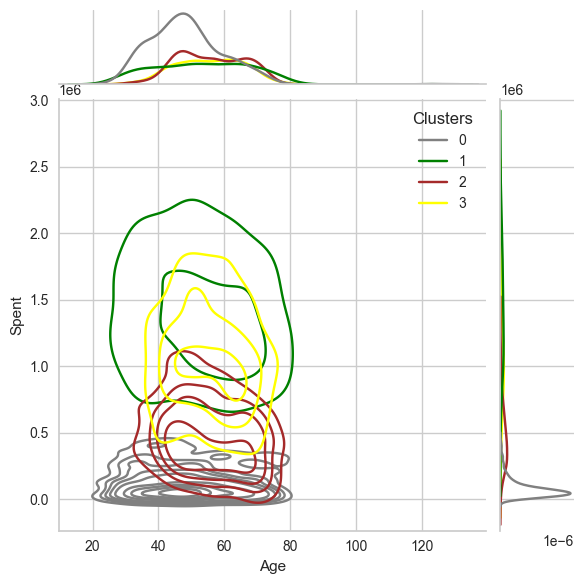

<Figure size 800x550 with 0 Axes>

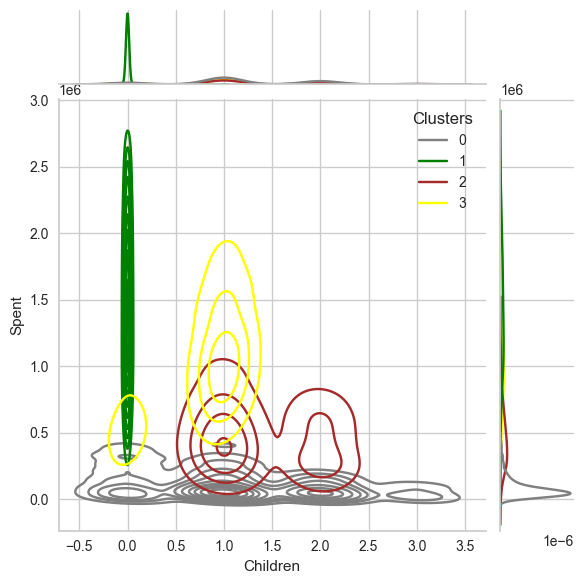

KeyError: 'Family_Size'

<Figure size 800x550 with 0 Axes>

In [44]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()


**some points about the cluster**

**CLUSTER 1**:
      most have a teenager at home.
     
**CLUSTER 2**:                               
     A high income group.
     
**CLUSTER 3**:
     Relatively younger.
     
**CLUSTER 4**:  
         A lower income group.

## EVALUATING WITH TEST DATA

In [2]:
t_data=pd.read_csv('customer_test (1).csv')
t_data

Unnamed: 0.1  Unnamed: 0     ID  Year_Birth Education Marital_Status   
0            1681        1681   5939        1971        S1    Bertunangan  \
1            1682        1682   2156        1955        S3        Menikah   
2            1683        1683   7788        1983        S3        Menikah   
3            1684        1684  10323        1952        S1        Menikah   
4            1685        1685   7947        1969        S1        Menikah   
..            ...         ...    ...         ...       ...            ...   
554          2235        2235  10870        1967        S1        Menikah   
555          2236        2236   4001        1946        S3    Bertunangan   
556          2237        2237   7270        1981        S1          Cerai   
557          2238        2238   8235        1956        S2    Bertunangan   
558          2239        2239   9405        1954        S3        Menikah   

         Income  Kidhome  Teenhome Dt_Customer  ...  NumWebVisitsMonth   
0    38232000.0        1         1  17-01-2014  ...                  5  \
1    22554000.0        1         1  03-11-2012  ...                  5   
2    23536000.0        1         0  04-06-2014  ...                  3   
3    49413000.0        0         1  25-10-2013  ...                  5   
4    42231000.0        1         1  25-03-2014  ...                  5   
..          ...      ...       ...         ...  ...                ...   
554  61223000.0        0         1  13-06-2013  ...                  5   
555  64014000.0        2         1  10-06-2014  ...                  7   
556  56981000.0        0         0  25-01-2014  ...                  6   
557  69245000.0        0         1  24-01-2014  ...                  3   
558  52869000.0        1         1  15-10-2012  ...                  7   

     AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   
0               0             0             0             0             0  \
1               0             0             0             0             0   
2               0             0             0             0             0   
3               0             0             0             0             0   
4               0             0             0             0             0   
..            ...           ...           ...           ...           ...   
554             0             0             0             0             0   
555             0             0             0             1             0   
556             0             1             0             0             0   
557             0             0             0             0             0   
558             0             0             0             0             0   

     Complain  Z_CostContact  Z_Revenue  Response  
0           0              3         11         0  
1           0              3         11         0  
2           0              3         11         0  
3           0              3         11         0  
4           0              3         11         0  
..        ...            ...        ...       ...  
554         0              3         11         0  
555         0              3         11         0  
556         0              3         11         0  
557         0              3         11         0  
558         0              3         11         1  

[559 rows x 31 columns]

In [3]:
t_data.shape

(559, 31)

In [5]:
t_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [36]:
t_data.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
Education              0
Income                 7
Kidhome                0
Teenhome               0
Recency                0
Coke                   0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Customer_For           0
Age                    0
Spent                  0
Children               0
Is_Parent              0
dtype: int64

In [11]:
t_data.duplicated().sum()

0

In [39]:
t_data.dropna()


Unnamed: 0.1  Unnamed: 0  Education      Income  Kidhome  Teenhome   
0            1681        1681          0  38232000.0        1         1  \
1            1682        1682          1  22554000.0        1         1   
2            1683        1683          1  23536000.0        1         0   
3            1684        1684          0  49413000.0        0         1   
4            1685        1685          0  42231000.0        1         1   
..            ...         ...        ...         ...      ...       ...   
554          2235        2235          0  61223000.0        0         1   
555          2236        2236          1  64014000.0        2         1   
556          2237        2237          0  56981000.0        0         0   
557          2238        2238          2  69245000.0        0         1   
558          2239        2239          1  52869000.0        1         1   

     Recency    Coke  Fruits    Meat  ...  AcceptedCmp5  AcceptedCmp1   
0         84   43000    5000   28000  ...             0             0  \
1         38   27000       0   10000  ...             0             0   
2         53    6000       0    3000  ...             0             0   
3         88  205000    7000   41000  ...             0             0   
4         99   24000       0    8000  ...             0             0   
..       ...     ...     ...     ...  ...           ...           ...   
554       46  709000   43000  182000  ...             0             0   
555       56  406000       0   30000  ...             0             1   
556       91  908000   48000  217000  ...             0             0   
557        8  428000   30000  214000  ...             0             0   
558       40   84000    3000   61000  ...             0             0   

     AcceptedCmp2  Complain  Response       Customer_For  Age    Spent   
0               0         0         0  27907200000000000   50   122000  \
1               0         0         0  86400000000000000   66    41000   
2               0         0         0  21081600000000000   38    10000   
3               0         0         0  35164800000000000   69   304000   
4               0         0         0  22118400000000000   52    37000   
..            ...       ...       ...                ...  ...      ...   
554             0         0         0  46742400000000000   54  1341000   
555             0         0         0   5270400000000000   75   444000   
556             0         0         0  27216000000000000   40  1241000   
557             0         0         0  27302400000000000   65   843000   
558             0         0         1  67564800000000000   67   172000   

     Children  Is_Parent  
0           2          1  
1           2          1  
2           1          1  
3           1          1  
4           2          1  
..        ...        ...  
554         1          1  
555         3          1  
556         0          0  
557         1          1  
558         2          1  

[552 rows x 30 columns]

In [40]:
t_data.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
Education              0
Income                 7
Kidhome                0
Teenhome               0
Recency                0
Coke                   0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Customer_For           0
Age                    0
Spent                  0
Children               0
Is_Parent              0
dtype: int64

In [13]:
print(len(t_data))

559


In [15]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         559 non-null    int64  
 1   Unnamed: 0           559 non-null    int64  
 2   ID                   559 non-null    int64  
 3   Year_Birth           559 non-null    int64  
 4   Education            559 non-null    object 
 5   Marital_Status       559 non-null    object 
 6   Income               552 non-null    float64
 7   Kidhome              559 non-null    int64  
 8   Teenhome             559 non-null    int64  
 9   Dt_Customer          559 non-null    object 
 10  Recency              559 non-null    int64  
 11  MntCoke              559 non-null    int64  
 12  MntFruits            559 non-null    int64  
 13  MntMeatProducts      559 non-null    int64  
 14  MntFishProducts      559 non-null    int64  
 15  MntSweetProducts     559 non-null    int

In [4]:
t_data["Dt_Customer"] = pd.to_datetime(t_data["Dt_Customer"],format='mixed')
dates = []
for i in t_data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))


The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [5]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
t_data["Customer_For"] = days
t_data["Customer_For"] = pd.to_numeric(t_data["Customer_For"], errors="coerce")
t_data

Unnamed: 0.1  Unnamed: 0     ID  Year_Birth Education Marital_Status   
0            1681        1681   5939        1971        S1    Bertunangan  \
1            1682        1682   2156        1955        S3        Menikah   
2            1683        1683   7788        1983        S3        Menikah   
3            1684        1684  10323        1952        S1        Menikah   
4            1685        1685   7947        1969        S1        Menikah   
..            ...         ...    ...         ...       ...            ...   
554          2235        2235  10870        1967        S1        Menikah   
555          2236        2236   4001        1946        S3    Bertunangan   
556          2237        2237   7270        1981        S1          Cerai   
557          2238        2238   8235        1956        S2    Bertunangan   
558          2239        2239   9405        1954        S3        Menikah   

         Income  Kidhome  Teenhome Dt_Customer  ...  AcceptedCmp3   
0    38232000.0        1         1  2014-01-17  ...             0  \
1    22554000.0        1         1  2012-03-11  ...             0   
2    23536000.0        1         0  2014-04-06  ...             0   
3    49413000.0        0         1  2013-10-25  ...             0   
4    42231000.0        1         1  2014-03-25  ...             0   
..          ...      ...       ...         ...  ...           ...   
554  61223000.0        0         1  2013-06-13  ...             0   
555  64014000.0        2         1  2014-10-06  ...             0   
556  56981000.0        0         0  2014-01-25  ...             0   
557  69245000.0        0         1  2014-01-24  ...             0   
558  52869000.0        1         1  2012-10-15  ...             0   

     AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain   
0               0             0             0             0         0  \
1               0             0             0             0         0   
2               0             0             0             0         0   
3               0             0             0             0         0   
4               0             0             0             0         0   
..            ...           ...           ...           ...       ...   
554             0             0             0             0         0   
555             0             0             1             0         0   
556             1             0             0             0         0   
557             0             0             0             0         0   
558             0             0             0             0         0   

     Z_CostContact  Z_Revenue  Response       Customer_For  
0                3         11         0  27907200000000000  
1                3         11         0  86400000000000000  
2                3         11         0  21081600000000000  
3                3         11         0  35164800000000000  
4                3         11         0  22118400000000000  
..             ...        ...       ...                ...  
554              3         11         0  46742400000000000  
555              3         11         0   5270400000000000  
556              3         11         0  27216000000000000  
557              3         11         0  27302400000000000  
558              3         11         1  67564800000000000  

[559 rows x 32 columns]

In [19]:
t_data["Marital_Status"].value_counts()

Marital_Status
Menikah        214
Bertunangan    141
Lajang         124
Cerai           55
Janda           25
Name: count, dtype: int64

In [20]:
t_data['Education'].value_counts()

Education
S1     292
S3     113
S2      91
D3      44
SMA     19
Name: count, dtype: int64

In [6]:
#Feature Engineering
#Age of customer today 
t_data["Age"] = 2021-t_data["Year_Birth"]


In [7]:
#Total spendings on various items
t_data["Spent"] =t_data["MntCoke"]+t_data["MntFruits"]+t_data["MntMeatProducts"]+t_data["MntFishProducts"]+t_data["MntSweetProducts"]+t_data["MntGoldProds"]


In [8]:
#converting catagorical in to numerical
t_data["Marital_Status"]=t_data["Marital_Status"].replace({'Menikah':'0','Bertunangan':'1', 'Lajang':'2','Cerai':'3' ,'Janda':'4', 'Duda':'5'})
t_data["Education"]=t_data["Education"].replace({"S1":"0", "S3":"1", "S2":"2", "D3":"3", "SMA":"4"})

In [9]:
#Feature indicating total children living in the household
t_data["Children"]=t_data["Kidhome"]+t_data["Teenhome"]


In [10]:
#Feature pertaining parenthood
t_data["Is_Parent"] = np.where(t_data.Children> 0, 1, 0)


In [11]:
#For clarity
t_data=t_data.rename(columns={"MntCoke": "Coke","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


In [12]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
t_data = t_data.drop(to_drop, axis=1)

In [13]:
t_data

Unnamed: 0.1  Unnamed: 0 Education      Income  Kidhome  Teenhome   
0            1681        1681         0  38232000.0        1         1  \
1            1682        1682         1  22554000.0        1         1   
2            1683        1683         1  23536000.0        1         0   
3            1684        1684         0  49413000.0        0         1   
4            1685        1685         0  42231000.0        1         1   
..            ...         ...       ...         ...      ...       ...   
554          2235        2235         0  61223000.0        0         1   
555          2236        2236         1  64014000.0        2         1   
556          2237        2237         0  56981000.0        0         0   
557          2238        2238         2  69245000.0        0         1   
558          2239        2239         1  52869000.0        1         1   

     Recency    Coke  Fruits    Meat  ...  AcceptedCmp5  AcceptedCmp1   
0         84   43000    5000   28000  ...             0             0  \
1         38   27000       0   10000  ...             0             0   
2         53    6000       0    3000  ...             0             0   
3         88  205000    7000   41000  ...             0             0   
4         99   24000       0    8000  ...             0             0   
..       ...     ...     ...     ...  ...           ...           ...   
554       46  709000   43000  182000  ...             0             0   
555       56  406000       0   30000  ...             0             1   
556       91  908000   48000  217000  ...             0             0   
557        8  428000   30000  214000  ...             0             0   
558       40   84000    3000   61000  ...             0             0   

     AcceptedCmp2  Complain  Response       Customer_For  Age    Spent   
0               0         0         0  27907200000000000   50   122000  \
1               0         0         0  86400000000000000   66    41000   
2               0         0         0  21081600000000000   38    10000   
3               0         0         0  35164800000000000   69   304000   
4               0         0         0  22118400000000000   52    37000   
..            ...       ...       ...                ...  ...      ...   
554             0         0         0  46742400000000000   54  1341000   
555             0         0         0   5270400000000000   75   444000   
556             0         0         0  27216000000000000   40  1241000   
557             0         0         0  27302400000000000   65   843000   
558             0         0         1  67564800000000000   67   172000   

     Children  Is_Parent  
0           2          1  
1           2          1  
2           1          1  
3           1          1  
4           2          1  
..        ...        ...  
554         1          1  
555         3          1  
556         0          0  
557         1          1  
558         2          1  

[559 rows x 30 columns]

In [34]:
t_data.describe()

Unnamed: 0.1   Unnamed: 0        Income     Kidhome    Teenhome   
count    559.000000   559.000000  5.520000e+02  559.000000  559.000000  \
mean    1960.000000  1960.000000  5.291597e+07    0.420394    0.525939   
std      161.513673   161.513673  3.397271e+07    0.511880    0.527682   
min     1681.000000  1681.000000  4.023000e+06    0.000000    0.000000   
25%     1820.500000  1820.500000  3.423900e+07    0.000000    0.000000   
50%     1960.000000  1960.000000  5.246300e+07    0.000000    1.000000   
75%     2099.500000  2099.500000  6.956550e+07    1.000000    1.000000   
max     2239.000000  2239.000000  6.666660e+08    2.000000    2.000000   

          Recency          Coke         Fruits          Meat           Fish   
count  559.000000  5.590000e+02     559.000000  5.590000e+02     559.000000  \
mean    49.187835  3.003488e+05   27293.381038  1.698909e+05   39171.735242   
std     29.109522  3.303610e+05   40361.180414  2.300301e+05   56039.372894   
min      0.000000  0.000000e+00       0.000000  0.000000e+00       0.000000   
25%     25.000000  2.300000e+04    2000.000000  1.500000e+04    3000.000000   
50%     49.000000  1.750000e+05    8000.000000  6.400000e+04   12000.000000   
75%     74.000000  5.140000e+05   35000.000000  2.245000e+05   55000.000000   
max     99.000000  1.493000e+06  194000.000000  1.607000e+06  258000.000000   

       ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   
count  ...    559.000000    559.000000    559.000000    559.000000  \
mean   ...      0.075134      0.084079      0.067979      0.017889   
std    ...      0.263844      0.277754      0.251935      0.132667   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

         Complain    Response         Age    Children         Spent   
count  559.000000  559.000000  559.000000  559.000000  5.590000e+02  \
mean     0.007156    0.164580   52.336315    0.946333  6.097657e+05   
std      0.084363    0.371133   11.867607    0.716410  6.035638e+05   
min      0.000000    0.000000   26.000000    0.000000  8.000000e+03   
25%      0.000000    0.000000   44.000000    0.000000  6.800000e+04   
50%      0.000000    0.000000   51.000000    1.000000  4.130000e+05   
75%      0.000000    0.000000   62.500000    1.000000  1.059500e+06   
max      1.000000    1.000000   81.000000    3.000000  2.257000e+06   

        Is_Parent  
count  559.000000  
mean     0.728086  
std      0.445344  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  

[8 rows x 28 columns]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

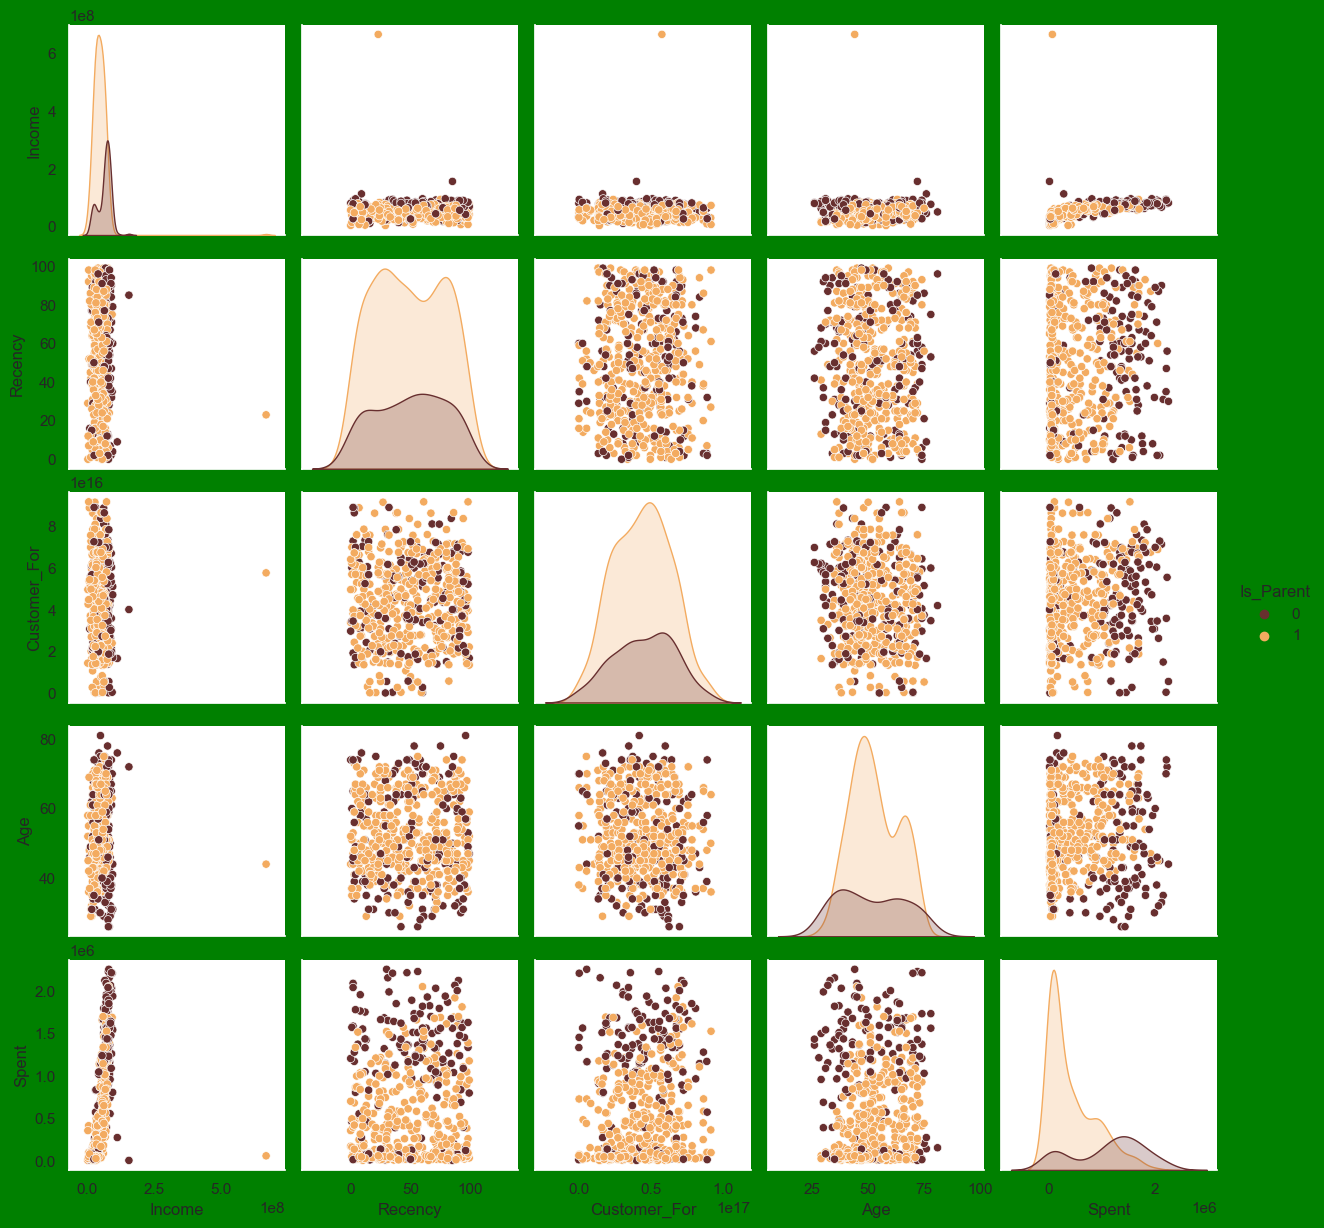

In [38]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"green"})
pallet = ["yellow", "blue", "red", "violet", "green", "orange"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(t_data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

<Axes: >

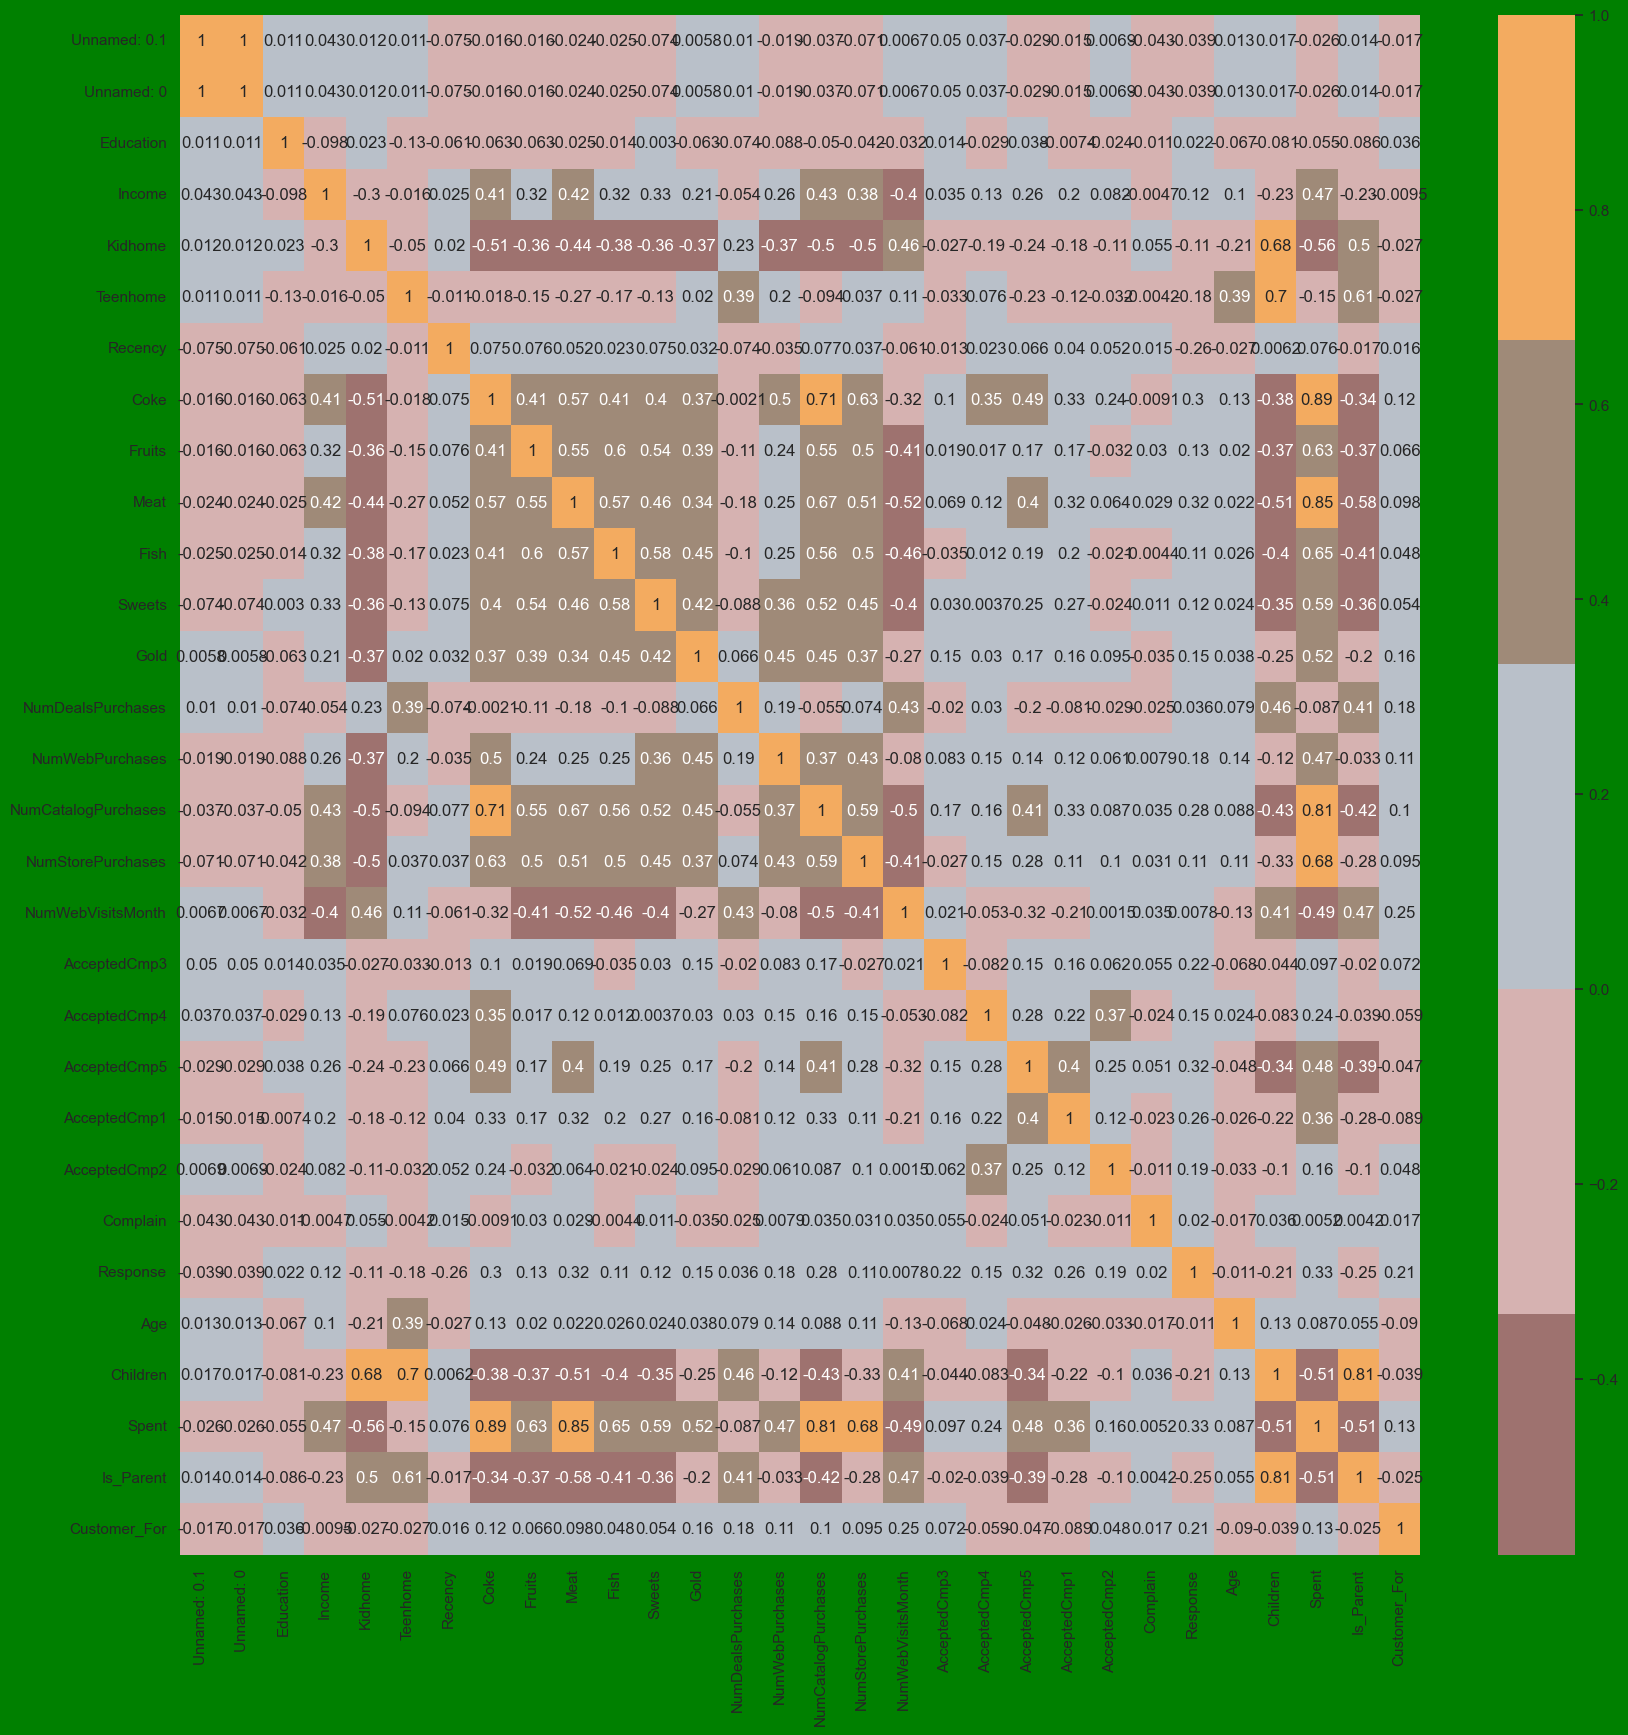

In [39]:
#correlation matrix
corrmat= t_data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [14]:
#Get list of categorical variables
s = (t_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education']


In [15]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    t_data[i]=t_data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [16]:
#Creating a copy of data
ds = t_data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [17]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Unnamed: 0.1  Unnamed: 0  Education    Income   Kidhome  Teenhome   
0     -1.728955   -1.728955  -0.790453 -0.432621  1.133324  0.899189  \
1     -1.722758   -1.722758   0.088003 -0.894527  1.133324  0.899189   
2     -1.716561   -1.716561   0.088003 -0.865595  1.133324 -0.997591   
3     -1.710364   -1.710364  -0.790453 -0.103205 -0.822010  0.899189   
4     -1.704167   -1.704167  -0.790453 -0.314802  1.133324  0.899189   

    Recency      Coke    Fruits      Meat  ...  NumDealsPurchases   
0  1.196974 -0.779691 -0.552842 -0.617389  ...           0.937951  \
1 -0.384680 -0.828166 -0.676834 -0.695709  ...           0.937951   
2  0.131077 -0.891790 -0.676834 -0.726167  ...          -0.703953   
3  1.334509 -0.288879 -0.503245 -0.560824  ...          -0.156651   
4  1.712731 -0.837255 -0.676834 -0.704412  ...          -0.703953   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth   
0        -0.395443            -0.589324          -0.853483          -0.116205  \
1        -0.720999            -0.952534          -0.547652          -0.116205   
2        -1.372112            -0.952534          -0.853483          -0.965340   
3        -0.069887            -0.226113          -0.241820          -0.116205   
4        -1.046555            -0.952534          -0.853483          -0.116205   

   Customer_For       Age     Spent  Children  Is_Parent  
0     -0.814687 -0.197041 -0.808866  1.472077   0.611117  
1      2.075246  1.152374 -0.943190  1.472077   0.611117  
2     -1.151916 -1.209103 -0.994597  0.074978   0.611117  
3     -0.456113  1.405389 -0.507054  0.074978   0.611117  
4     -1.100692 -0.028364 -0.949823  1.472077   0.611117  

[5 rows x 23 columns]

In [26]:
scaled_ds.dropna()
scaled_ds

Unnamed: 0.1  Unnamed: 0  Education    Income   Kidhome  Teenhome   
0       -1.728955   -1.728955  -0.790453 -0.432621  1.133324  0.899189  \
1       -1.722758   -1.722758   0.088003 -0.894527  1.133324  0.899189   
2       -1.716561   -1.716561   0.088003 -0.865595  1.133324 -0.997591   
3       -1.710364   -1.710364  -0.790453 -0.103205 -0.822010  0.899189   
4       -1.704167   -1.704167  -0.790453 -0.314802  1.133324  0.899189   
..            ...         ...        ...       ...       ...       ...   
554      1.704167    1.704167  -0.790453  0.244742 -0.822010  0.899189   
555      1.710364    1.710364   0.088003  0.326971  3.088659  0.899189   
556      1.716561    1.716561  -0.790453  0.119764 -0.822010 -0.997591   
557      1.722758    1.722758   0.966458  0.481087 -0.822010  0.899189   
558      1.728955    1.728955   0.088003 -0.001384  1.133324  0.899189   

      Recency      Coke    Fruits      Meat  ...  NumDealsPurchases   
0    1.196974 -0.779691 -0.552842 -0.617389  ...           0.937951  \
1   -0.384680 -0.828166 -0.676834 -0.695709  ...           0.937951   
2    0.131077 -0.891790 -0.676834 -0.726167  ...          -0.703953   
3    1.334509 -0.288879 -0.503245 -0.560824  ...          -0.156651   
4    1.712731 -0.837255 -0.676834 -0.704412  ...          -0.703953   
..        ...       ...       ...       ...  ...                ...   
554 -0.109610  1.238092  0.389500  0.052689  ...          -0.156651   
555  0.234228  0.320092 -0.676834 -0.608686  ...           2.579854   
556  1.437661  1.841003  0.513493  0.204979  ...          -0.703953   
557 -1.416194  0.386745  0.067120  0.191925  ...          -0.156651   
558 -0.315913 -0.655473 -0.602439 -0.473801  ...           0.390650   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases   
0          -0.395443            -0.589324          -0.853483  \
1          -0.720999            -0.952534          -0.547652   
2          -1.372112            -0.952534          -0.853483   
3          -0.069887            -0.226113          -0.241820   
4          -1.046555            -0.952534          -0.853483   
..               ...                  ...                ...   
554         1.557894             0.137097          -0.547652   
555         1.232338            -0.226113          -0.241820   
556        -0.720999             0.137097           2.204831   
557         0.581226             0.863518           1.287337   
558        -0.395443            -0.589324          -0.547652   

     NumWebVisitsMonth  Customer_For       Age     Spent  Children  Is_Parent  
0            -0.116205     -0.814687 -0.197041 -0.808866  1.472077   0.611117  
1            -0.116205      2.075246  1.152374 -0.943190  1.472077   0.611117  
2            -0.965340     -1.151916 -1.209103 -0.994597  0.074978   0.611117  
3            -0.116205     -0.456113  1.405389 -0.507054  0.074978   0.611117  
4            -0.116205     -1.100692 -0.028364 -0.949823  1.472077   0.611117  
..                 ...           ...       ...       ...       ...        ...  
554          -0.116205      0.115897  0.140313  1.212613  0.074978   0.611117  
555           0.732929     -1.933095  1.911420 -0.274891  2.869175   0.611117  
556           0.308362     -0.848836 -1.040426  1.046782 -1.322120  -1.636347  
557          -0.965340     -0.844568  1.068036  0.386775  0.074978   0.611117  
558           0.732929      1.144662  1.236713 -0.725951  1.472077   0.611117  

[559 rows x 23 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


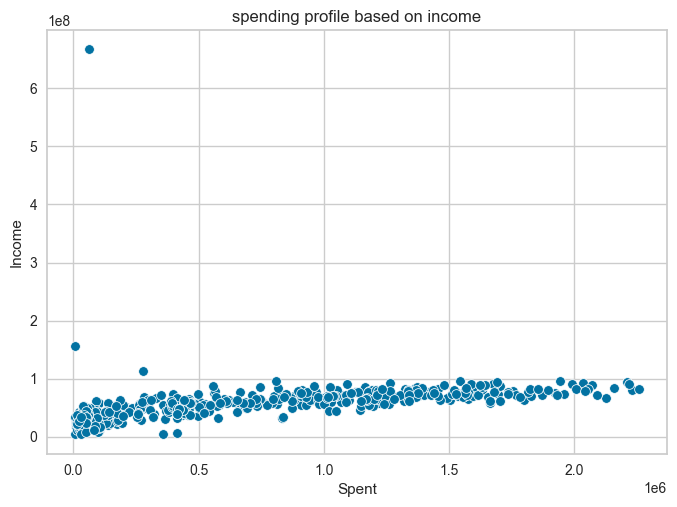

In [72]:
pl = sns.scatterplot(data = t_data,x=t_data["Spent"], y=t_data["Income"], palette= pal)
pl.set_title("spending profile based on income")
plt.legend()
plt.show()

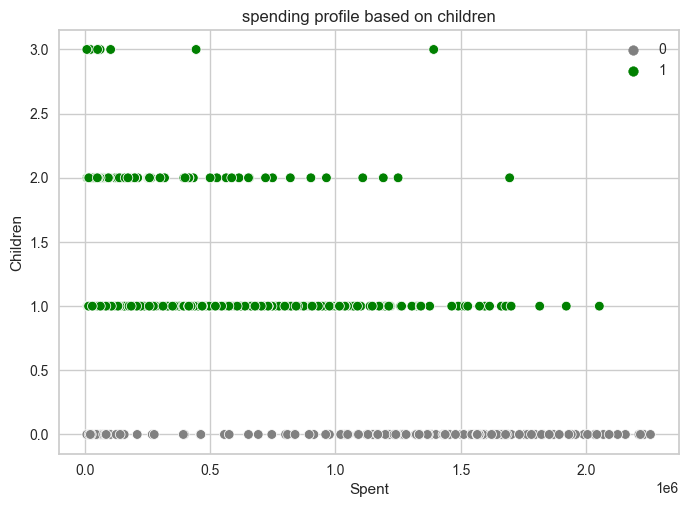

In [75]:
pl = sns.scatterplot(data = t_data,x=t_data["Spent"], y=t_data["Children"],hue=t_data['Is_Parent'], palette= pal)
pl.set_title("spending profile based on children")
plt.legend()
plt.show()